In [1]:
import numpy as np
import pandas as pd


In [2]:
data_loan = pd.read_csv('datasets/Loan_data.csv')

In [3]:
data_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- This data_loan(info) gives the breif introduction of all the attributes 
- thier non null counts and respective data types
- this data set has 13 attributes
- and 614 entries

## 1.Univariate Analysis

### analysis on Continous variables

In [5]:
data_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- describe() only return result for continous variables
- it gives stastical details

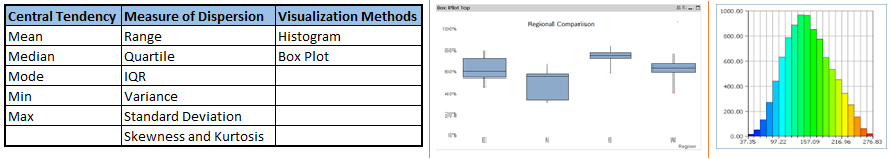

In [6]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

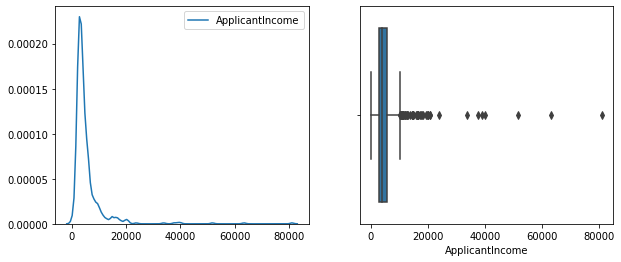

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sb.kdeplot(data_loan['ApplicantIncome'])

plt.subplot(122)
sb.boxplot(data_loan['ApplicantIncome'])
# data_loan['ApplicantIncome'].skew()

- the plot shows that applicant income is +vely skewed
- and to check outliers boxplot

7.491531216657306

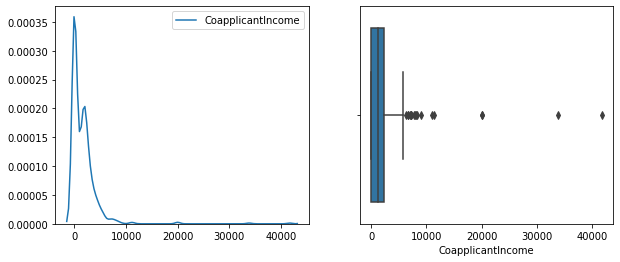

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sb.kdeplot(data_loan['CoapplicantIncome'])

plt.subplot(122)
sb.boxplot(data_loan['CoapplicantIncome'])
data_loan['CoapplicantIncome'].skew()

2.677551679256059

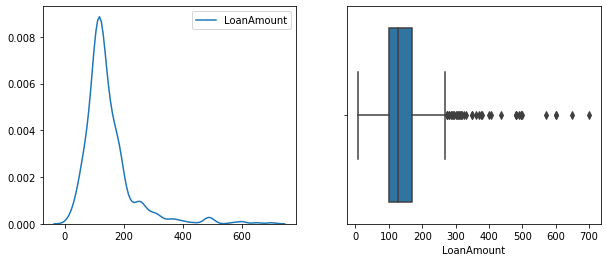

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sb.kdeplot(data_loan['LoanAmount'])

plt.subplot(122)
sb.boxplot(data_loan['LoanAmount'])
data_loan['LoanAmount'].skew()

In [10]:
num_data = data_loan._get_numeric_data()
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


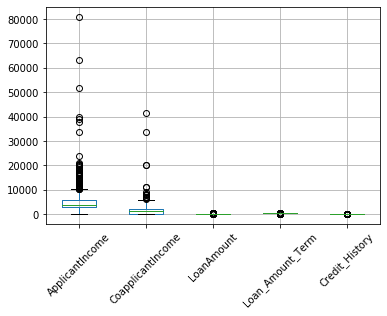

In [11]:
num_data.boxplot(rot=45)

### analysis on categorical variables

Y    422
N    192
Name: Loan_Status, dtype: int64


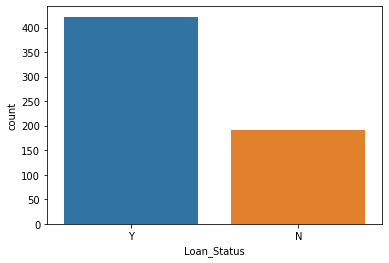

In [12]:
print(data_loan['Loan_Status'].value_counts())
sb.countplot(data_loan['Loan_Status'])

Male      489
Female    112
Name: Gender, dtype: int64


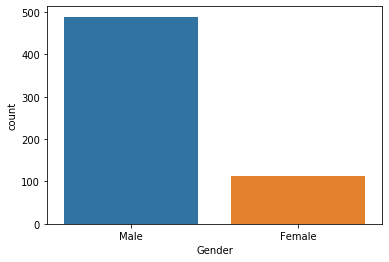

In [13]:
print(data_loan['Gender'].value_counts())
sb.countplot(data_loan['Gender'])

Yes    398
No     213
Name: Married, dtype: int64


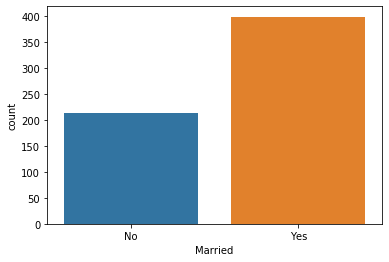

In [14]:
print(data_loan['Married'].value_counts())
sb.countplot(data_loan['Married'])

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


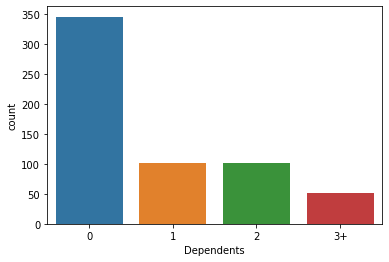

In [15]:
print(data_loan['Dependents'].value_counts())
sb.countplot(data_loan['Dependents'])

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


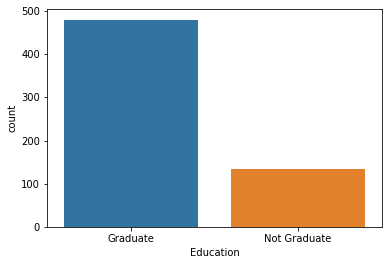

In [16]:
print(data_loan['Education'].value_counts())
sb.countplot(data_loan['Education'])

No     500
Yes     82
Name: Self_Employed, dtype: int64


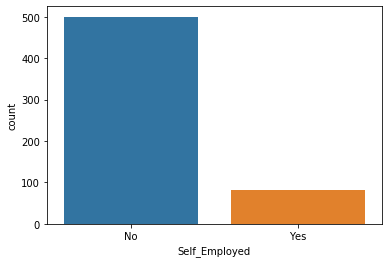

In [17]:
print(data_loan['Self_Employed'].value_counts())
sb.countplot(data_loan['Self_Employed'])

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


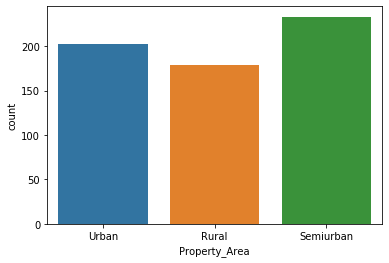

In [18]:
print(data_loan['Property_Area'].value_counts())
sb.countplot(data_loan['Property_Area'])

## 2.Bivariate analysis

#### numerical vs categorical

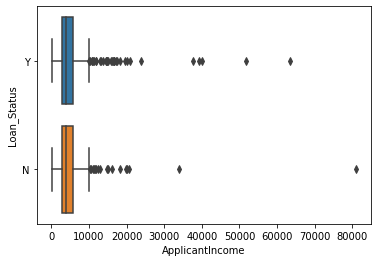

In [19]:
sb.boxplot(data_loan['ApplicantIncome'],data_loan['Loan_Status'])

#### Here we inferm from this that there is no relation between loan status and applicant income 

In [20]:
from scipy.stats import f_oneway

Null Hypotheses for ANOVA-All means are equal -h0

Alternate Hypothese for ANOVA-All means are not equal - h1

In [21]:
f_oneway(data_loan[data_loan['Loan_Status']=='Y']['ApplicantIncome'],
        data_loan[data_loan['Loan_Status']=='N']['ApplicantIncome'])

F_onewayResult(statistic=0.013574218522301743, pvalue=0.907287812130378)

-  null hypotheses is that means are equal
-  p value is > than 0.05 therefore null hyotheses is accepted.
-  this means that 91% of means are equal

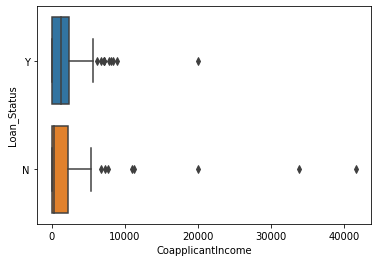

In [22]:
sb.boxplot(data_loan['CoapplicantIncome'],data_loan['Loan_Status'])

In [23]:
data_loan['tatal_income'] = data_loan['ApplicantIncome']+data_loan['CoapplicantIncome']
data_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tatal_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


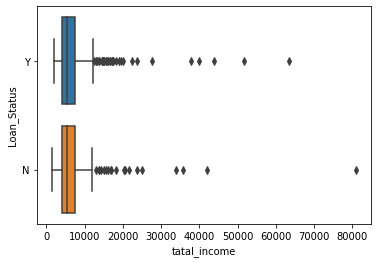

In [24]:
sb.boxplot(data_loan['tatal_income'],data_loan['Loan_Status'])

#### Categorical to categorical

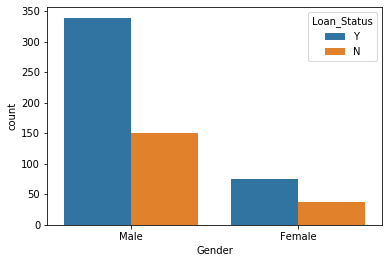

In [25]:
sb.countplot(data_loan['Gender'],hue=data_loan['Loan_Status'])

- from this figure we can say that male applicants have got loans morethan female applicants

#### Applying chisquare

- H0 two attributes are independent
- H1 tow attributes are dependent

In [26]:
freq_tab = pd.crosstab(data_loan['Gender'],data_loan['Loan_Status'])
freq_tab

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [27]:
from scipy.stats import chi2_contingency
chi2_contingency(freq_tab) # expected values in statistics, goodness of fit it contains [chisquare value,P value, expected values]

(0.13962612116543877,
 0.7086529816451106,
 1,
 array([[ 34.84858569,  77.15141431],
        [152.15141431, 336.84858569]]))

- we accept alternate hypothesis and reject null hypothesis since there is dependency between two attributes

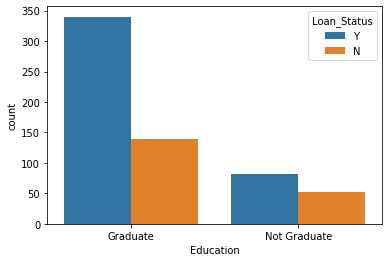

In [28]:
sb.countplot(data_loan['Education'],hue=data_loan['Loan_Status'])

In [29]:
freq_tab = pd.crosstab(data_loan['Education'],data_loan['Loan_Status'])
chi2_contingency(freq_tab)

(4.091490413303621,
 0.04309962129357355,
 1,
 array([[150.09771987, 329.90228013],
        [ 41.90228013,  92.09771987]]))

In [30]:
freq_tab

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [31]:
data_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'tatal_income'],
      dtype='object')

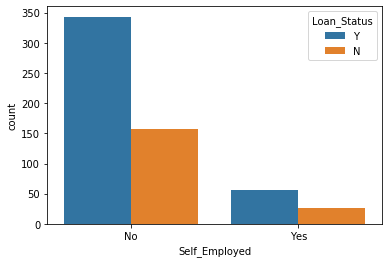

In [32]:
sb.countplot(data_loan['Self_Employed'],hue=data_loan['Loan_Status'])

In [33]:
freq_tab = pd.crosstab(data_loan['Self_Employed'],data_loan['Loan_Status'])
chi2_contingency(freq_tab)

(0.005292770110001114,
 0.9420039242223718,
 1,
 array([[157.21649485, 342.78350515],
        [ 25.78350515,  56.21649485]]))

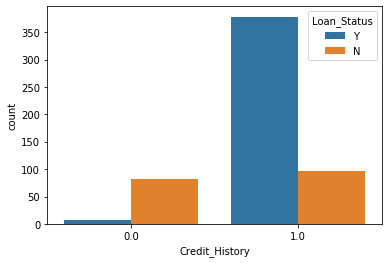

In [34]:
sb.countplot(data_loan['Credit_History'],hue=data_loan['Loan_Status'])

In [35]:
freq_tab = pd.crosstab(data_loan['Credit_History'],data_loan['Loan_Status'])
chi2_contingency(freq_tab)

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

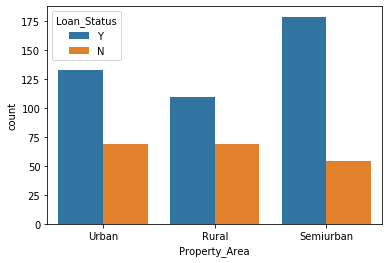

In [36]:
sb.countplot(data_loan['Property_Area'],hue=data_loan['Loan_Status'])

In [37]:
freq_tab = pd.crosstab(data_loan['Property_Area'],data_loan['Loan_Status'])
chi2_contingency(freq_tab)

(12.297623130485675,
 0.0021360187811644937,
 2,
 array([[ 55.97394137, 123.02605863],
        [ 72.85993485, 160.14006515],
        [ 63.16612378, 138.83387622]]))

#### Numerical vs numerical

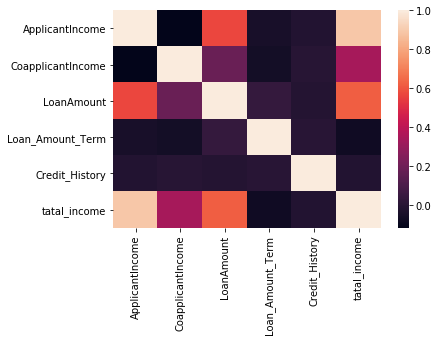

In [38]:
sb.heatmap(data_loan.corr())

In [39]:
data_loan.groupby('Gender').agg({'ApplicantIncome':['mean','max','min'],
                                'CoapplicantIncome':['mean','max']})

ApplicantIncome             CoapplicantIncome         
                  mean    max  min              mean      max
Gender                                                       
Female     4643.473214  19484  210       1108.008929  41667.0
Male       5446.460123  81000  150       1742.932352  33837.0

## 3.Missing Value Treatment

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model because we have not analysed the behavior and relationship with other variables correctly. It can lead to wrong prediction or classification.

In [40]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  tatal_income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [41]:
# data_loan.isnull()
data_loan.isnull().sum()
# data_loan.isnull().sum()/len(data_loan) * 100

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
tatal_income          0
dtype: int64

#### 1 Gender

In [42]:
data_loan['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [43]:
data_loan['Gender'].fillna('Male',inplace=True)

In [44]:
data_loan['Gender'].isnull().sum()

0

#### 2 Loan Ammount

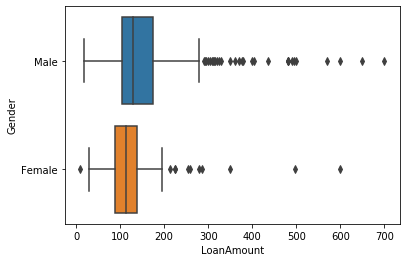

In [45]:
sb.boxplot(data_loan['LoanAmount'],data_loan['Gender'])

In [46]:
data_loan.groupby(data_loan['Gender'])['LoanAmount'].mean()

Gender
Female    126.697248
Male      150.861284
Name: LoanAmount, dtype: float64

- From the box plot fiuigure we got to know that avg loan amount for female is less than male
- so we impute null values in the column loan amount based on gender
- for female null value as 129.69, for male 149.26

In [47]:
data_loan['LoanAmount'] = data_loan.groupby(data_loan['Gender'])['LoanAmount'].apply(lambda x : x.fillna(x.mean()))

In [48]:
data_loan.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
tatal_income          0
dtype: int64

In [49]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  tatal_income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


#### 3 Credit history

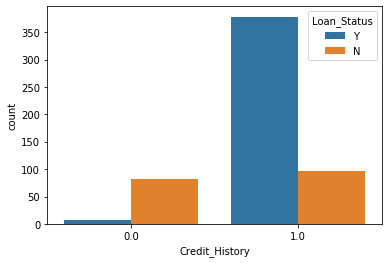

In [50]:
sb.countplot(data_loan['Credit_History'],hue=data_loan['Loan_Status'])

By seeing plot those applicants got loan have credit score as 1 

In [51]:
for i in data_loan['Loan_Status']=='Y' :
    if i ==True:
        data_loan['Credit_History'].fillna(1.0,inplace=True)
    else:
        data_loan['Credit_History'].fillna(1.0,inplace=True)

In [52]:
data_loan.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
tatal_income          0
dtype: int64

#### 4 Dependentas

In [53]:
data_loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [54]:
data_loan['Dependents'].fillna('0',inplace=True)

In [55]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  tatal_income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


#### 5 Loan Amount term

In [56]:
data_loan['Loan_Amount_Term'].fillna(360.0,inplace=True)

#### 6 Self employed

In [57]:
data_loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [58]:
data_loan['Self_Employed'].fillna('No',inplace=True)

In [59]:
data_loan[data_loan['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tatal_income
104,LP001357,Male,NaN,0,Graduate,No,3816,754.0,160.000000,360.0,1.0,Urban,Y,4570.0
228,LP001760,Male,NaN,0,Graduate,No,4758,0.0,158.000000,480.0,1.0,Semiurban,Y,4758.0
435,LP002393,Female,NaN,0,Graduate,No,10047,0.0,126.697248,240.0,1.0,Semiurban,Y,10047.0


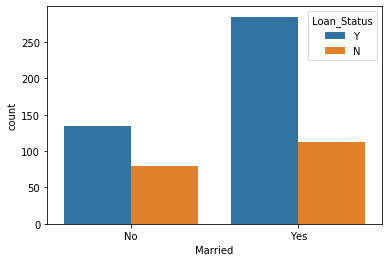

In [60]:
sb.countplot(data_loan['Married'],hue=data_loan['Loan_Status'])

In [61]:
data_loan['Married'].fillna('Yes',inplace=True)

In [62]:
data_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
tatal_income         0
dtype: int64

In [63]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  tatal_income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


### 4.Outlier Detection and Treatment

In [64]:
data_loan._get_numeric_data()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,tatal_income
0,5849,0.0,150.861284,360.0,1.0,5849.0
1,4583,1508.0,128.000000,360.0,1.0,6091.0
2,3000,0.0,66.000000,360.0,1.0,3000.0
3,2583,2358.0,120.000000,360.0,1.0,4941.0
4,6000,0.0,141.000000,360.0,1.0,6000.0
...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,2900.0
610,4106,0.0,40.000000,180.0,1.0,4106.0
611,8072,240.0,253.000000,360.0,1.0,8312.0
612,7583,0.0,187.000000,360.0,1.0,7583.0


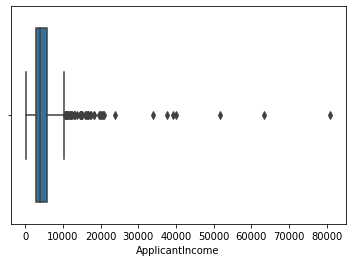

In [65]:
sb.boxplot(data_loan['ApplicantIncome'])

In [66]:
q1 = data_loan['ApplicantIncome'].quantile(0.25)
q3 = data_loan['ApplicantIncome'].quantile(0.75)
iqr = q3-q1
ub  = q3 + 1.5*iqr
lb  = q1 - 1.5*iqr
print(ub,lb)

10171.25 -1498.75


In [67]:
len(data_loan[data_loan['ApplicantIncome']>ub])

50

In [68]:
data_loan['ApplicantIncome'].quantile(0.92)

10397.240000000009

#### Capping technique

In [69]:
loan_data_num = data_loan._get_numeric_data() 

for i in loan_data_num.columns:
        q1 = loan_data_num[i].quantile(0.25)
        q3 = loan_data_num[i].quantile(0.75)
        iqr = q3-q1
        ub  = q3 + 1.5*iqr
        lb  = q1 - 1.5*iqr
        loan_data_num[i] = loan_data_num[i].replace(loan_data_num[loan_data_num[i]>ub][i],loan_data_num[i].quantile(0.95))
        loan_data_num[i] = loan_data_num[i].replace(loan_data_num[loan_data_num[i]<lb][i],loan_data_num[i].quantile(0.01))

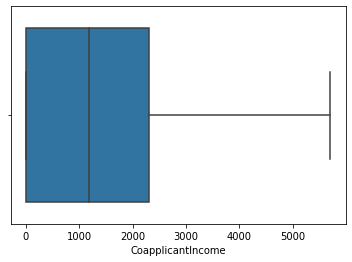

In [70]:
sb.boxplot(loan_data_num['CoapplicantIncome'])

In [71]:
for i in loan_data_num.columns:
    data_loan[i]=loan_data_num[i]

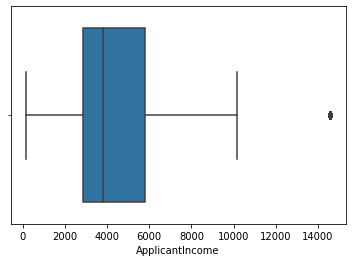

In [72]:
sb.boxplot(data_loan['ApplicantIncome'])

In [73]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  tatal_income       614 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 67.3+ KB


In [74]:
data_loan.drop('Loan_ID',axis=1,inplace=True)

In [75]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [76]:
data_loan['Gender'] = LE.fit_transform(data_loan['Gender'])
data_loan['Married'] = LE.fit_transform(data_loan['Married'])
data_loan['Dependents'] = LE.fit_transform(data_loan['Dependents'])
data_loan['Education'] = LE.fit_transform(data_loan['Education'])
data_loan['Self_Employed'] = LE.fit_transform(data_loan['Self_Employed'])
data_loan['Property_Area'] = LE.fit_transform(data_loan['Property_Area'])
data_loan['Loan_Status'] = LE.fit_transform(data_loan['Loan_Status'])


In [77]:
data_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tatal_income
0,1,0,0,0,0,5849,0.0,150.861284,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [78]:
data_loan1 = data_loan

In [79]:
data_loan1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
tatal_income         0
dtype: int64

#### Min Max Scalar (normalization)

In [80]:
data = data_loan1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','tatal_income']]
data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,tatal_income
0,5849,0.0,150.861284,360.0,5849.0
1,4583,1508.0,128.000000,360.0,6091.0
2,3000,0.0,66.000000,360.0,3000.0
3,2583,2358.0,120.000000,360.0,4941.0
4,6000,0.0,141.000000,360.0,6000.0


In [81]:
data.isna()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,tatal_income
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
609,False,False,False,False,False
610,False,False,False,False,False
611,False,False,False,False,False
612,False,False,False,False,False


In [82]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [83]:
mms = MinMaxScaler()
datamms = mms.fit_transform(data)

In [84]:
datamms = pd.DataFrame(datamms)

In [85]:
datamms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       614 non-null    float64
 1   1       614 non-null    float64
 2   2       614 non-null    float64
 3   3       614 non-null    float64
 4   4       614 non-null    float64
dtypes: float64(5)
memory usage: 24.1 KB


In [86]:
datamms.columns = data.columns

In [87]:
data_loan1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tatal_income
0,1,0,0,0,0,5849,0.0,150.861284,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,4106,0.0,40.000000,84.0,1.0,0,1,4106.0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,7583.0


In [88]:
datamms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    float64
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   tatal_income       614 non-null    float64
dtypes: float64(5)
memory usage: 24.1 KB


In [89]:
for i in data.columns:
    data_loan1[i]=datamms[i]

In [90]:
data_loan1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tatal_income
0,1,0,0,0,0,0.394859,0.000000,0.498809,1.0,1.0,2,1,0.299317
1,1,1,1,0,0,0.307143,0.264515,0.418425,1.0,1.0,0,0,0.315754
2,1,1,0,0,1,0.197464,0.000000,0.200422,1.0,1.0,2,1,0.105817
3,1,1,0,1,0,0.168572,0.413612,0.390295,1.0,1.0,2,1,0.237647
4,1,0,0,0,0,0.405321,0.000000,0.464135,1.0,1.0,2,1,0.309573


In [91]:
data_loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
 12  tatal_income       614 non-null    float64
dtypes: float64(6), int32(7)
memory usage: 45.7 KB


#### predictions

In [92]:
X = data_loan1.drop("Loan_Status",axis=1)
Y = data_loan1['Loan_Status']

#### Classification Algorithms
Scaled DataFrame required for these algorithms
- Logistic Regression.
- K-Nearest Neighbours.
- Support Vector Machine.

Scaled DataFrame  not required for these algorithms
- Decision Tree.
- Random Forest.
- Naïve Bayes.


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=50)

In [94]:
len(X_train), len(X_test)

(491, 123)

In [95]:
len(y_train), len(y_test)

(491, 123)

In [96]:
y_test.value_counts()

1    80
0    43
Name: Loan_Status, dtype: int64

In [97]:
y_train.value_counts()

1    342
0    149
Name: Loan_Status, dtype: int64

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [99]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred = lr.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [102]:
confusion_matrix(y_test,y_pred)

array([[19, 24],
       [ 2, 78]], dtype=int64)

In [103]:
accuracy_score(y_test,y_pred)

0.7886178861788617

In [104]:
from sklearn.neighbors import KNeighborsClassifier
kc = KNeighborsClassifier()
kc.fit(X_train,y_train)
y_pred = kc.predict(X_test)

In [105]:
confusion_matrix(y_test,y_pred)

array([[17, 26],
       [ 2, 78]], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred)

0.7723577235772358

#### using Decision tree classifier

In [107]:
X = data_loan.drop("Loan_Status",axis=1)
Y = data_loan['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [108]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [109]:
confusion_matrix(y_test,y_pred)

array([[32, 19],
       [14, 58]], dtype=int64)

In [110]:
accuracy_score(y_test,y_pred)

0.7317073170731707